In [5]:
import scanpy as sc 
import pandas as pd 

In [4]:
adata= sc.read_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_haem_compartment/bone_haem_atlas_FINAL_OBJECT_V3_FULL_GENES_for_figs.h5ad')

In [7]:
df= pd.read_csv('/nfs/team298/sm54/BoneAtlasProject/metadata/cell_metadata/ERY_Manual_Annotation_V4.csv')

In [10]:
df['ERY_Manual_Annotation_V4'].value_counts()

ERY_Manual_Annotation_V4
ERY (MID -> LATE)             14749
ERY (LATE)                    10415
ERY (MID)                      8455
ERY (LATE)_first_trimester     4887
ERY (EARLY)_CYCLING            3503
HSC/MPP                        2191
MK (EARLY)                     1598
MEMP/MEP                       1524
ERY (EARLY)                    1051
PROGENITOR                      784
ERY (LOW QUALITY)               515
ERY (YS)                        272
PROGENITOR (CD34+KIT+)           70
PROGENITOR (CD34+HLF+)           46
Name: count, dtype: int64

In [11]:
adata

AnnData object with n_obs × n_vars = 202241 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels', 'over_clustering', 'majority_voting', 'predicted_labels_Level1', 'predicted_labels_Level2', 'majority_voting_Level1', 'majority_voting_Level2', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'predicted_doublets_unfiltered', 'scrublet_cluster_score_unfiltered', 'bh_pval_unf

/software/isg/languages/Python/Python-3.11.10-jupyter/exec/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


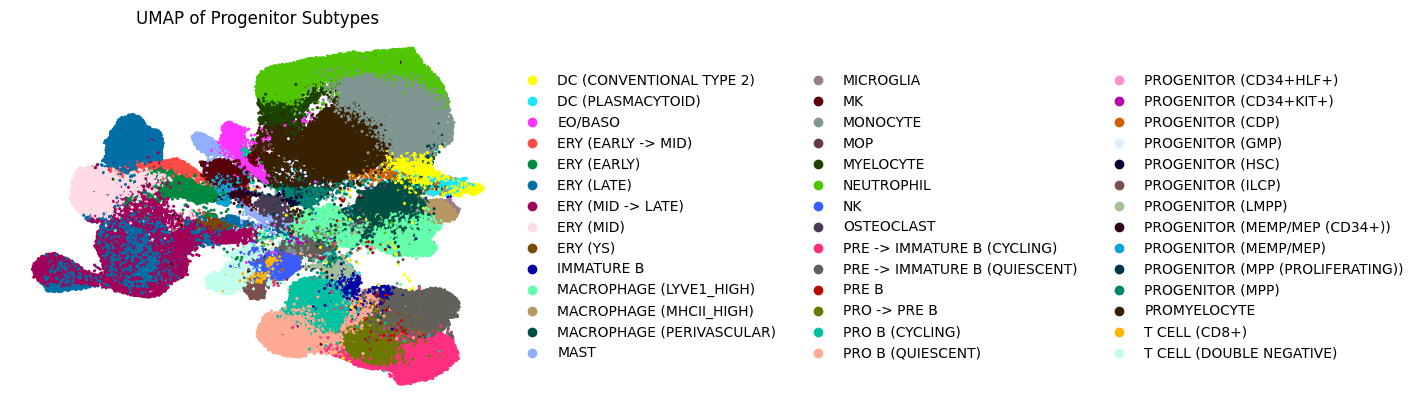

In [14]:
sc.pl.umap(
    adata,
    color="Haem_Manual_Annotation_Level1_V6",
    size=20,
    frameon=False,
    groups=[],
    title="UMAP of Progenitor Subtypes"
)

In [15]:
adata.obs['Haem_Manual_Annotation_Level0_V2'].value_counts()

Haem_Manual_Annotation_Level0_V2
B LINEAGE       53025
ERY             43847
MACROPHAGE      24785
MONOCYTE        23874
PROMYELOCYTE    22305
NEUTROPHIL      10801
PROGENITOR       6344
T CELL           4065
DC               3389
NK               2773
EO/BASO          2035
MK               1792
MYELOCYTE        1714
MAST             1312
Name: count, dtype: int64

In [49]:
1792 + 43847

45639

In [20]:
df['ERY_Manual_Annotation_V4'].value_counts()

ERY_Manual_Annotation_V4
ERY (MID -> LATE)             14749
ERY (LATE)                    10415
ERY (MID)                      8455
ERY (LATE)_first_trimester     4887
ERY (EARLY)_CYCLING            3503
HSC/MPP                        2191
MK (EARLY)                     1598
MEMP/MEP                       1524
ERY (EARLY)                    1051
PROGENITOR                      784
ERY (LOW QUALITY)               515
ERY (YS)                        272
PROGENITOR (CD34+KIT+)           70
PROGENITOR (CD34+HLF+)           46
Name: count, dtype: int64

In [27]:
SS=df[~df['ERY_Manual_Annotation_V4'].isin(['PROGENITOR (CD34+HLF+)','PROGENITOR (CD34+KIT+)',
                                     'PROGENITOR','HSC/MPP','MEMP/MEP'])]

In [28]:
SS['ERY_Manual_Annotation_V4'].value_counts()

ERY_Manual_Annotation_V4
ERY (MID -> LATE)             14749
ERY (LATE)                    10415
ERY (MID)                      8455
ERY (LATE)_first_trimester     4887
ERY (EARLY)_CYCLING            3503
MK (EARLY)                     1598
ERY (EARLY)                    1051
ERY (LOW QUALITY)               515
ERY (YS)                        272
Name: count, dtype: int64

In [29]:
SS

,Cell_ID,ERY_Manual_Annotation_V4
0,CGCAATGTCAGCAAGA-HCA_BN_F12482363,ERY (LATE)
1,ATCCAACAGTAAGGGC-HCA_BN_F12482363,ERY (EARLY)_CYCLING
2,TTATGCGCACCACAAC-HCA_BN_F12482366,MK (EARLY)
3,TTTGAGTCATCGCTCC-HCA_BN_F12482366,MK (EARLY)
4,AGGAACCAGCTCAAAC-HCA_BN_F12482366,ERY (YS)
...,...,...
50054,CGTGTAACACACCGAC-5478STDY7850149,ERY (LATE)_first_trimester
50055,CTACACCCAGCCTGTG-5478STDY7850149,ERY (LATE)_first_trimester
50056,AGATCTGTCCCAGGTG-5478STDY7850149,ERY (LATE)_first_trimester
50057,CGTCACTTCACGGTTA-5478STDY7850149,ERY (LATE)_first_trimester


In [30]:
43847

43847

In [41]:
len(set(SS['Cell_ID']) & set(adata.obs_names))

45445

In [50]:
# Ensure the target column exists in adata.obs (initialize with NA)
adata.obs['ERY_Manual_Annotation_V4'] = pd.NA

# Set Cell_ID as index in df for fast alignment
df_indexed = SS.set_index('Cell_ID')

# Get intersection of shared cell IDs
shared_cells = adata.obs_names.intersection(df_indexed.index)

# Transfer values
adata.obs.loc[shared_cells, 'ERY_Manual_Annotation_V4'] = df_indexed.loc[shared_cells, 'ERY_Manual_Annotation_V4']


/software/isg/languages/Python/Python-3.11.10-jupyter/exec/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


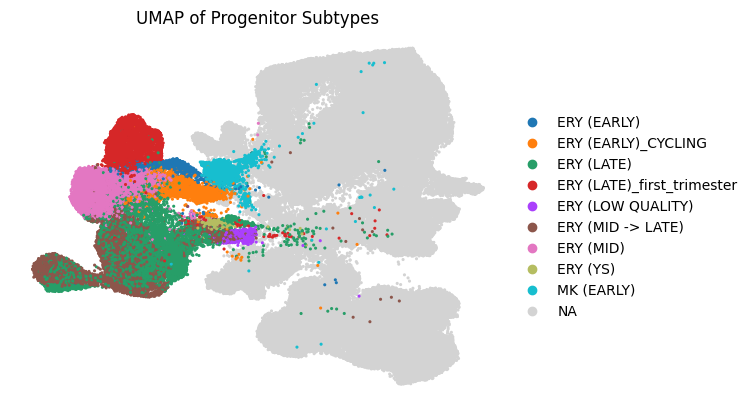

In [51]:
sc.pl.umap(
    adata,
    color="ERY_Manual_Annotation_V4",
    size=20,
    frameon=False,
    groups=[],
    title="UMAP of Progenitor Subtypes"
)

In [53]:
AD=adata[~adata.obs['ERY_Manual_Annotation_V4'].isna()]

/software/isg/languages/Python/Python-3.11.10-jupyter/exec/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


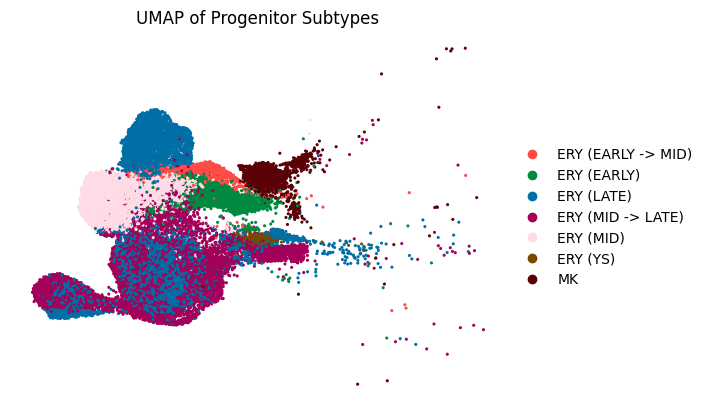

In [58]:
sc.pl.umap(
    AD,
    color="Haem_Manual_Annotation_Level1_V6",
    size=20,
    frameon=False,
    groups=[],
    title="UMAP of Progenitor Subtypes"
)

/software/isg/languages/Python/Python-3.11.10-jupyter/exec/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


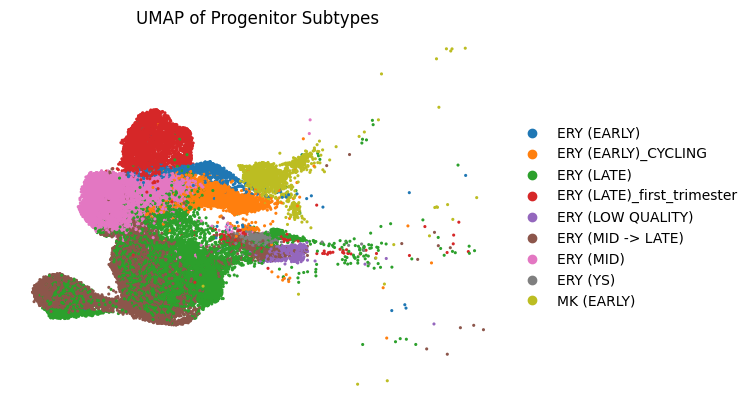

In [60]:
sc.pl.umap(
    AD,
    color="ERY_Manual_Annotation_V4",
    size=20,
    frameon=False,
    groups=[],
    title="UMAP of Progenitor Subtypes"
)

In [65]:
pd.crosstab(AD.obs['ERY_Manual_Annotation_V4'], AD.obs['Haem_Manual_Annotation_Level1_V6'])

Haem_Manual_Annotation_Level1_V6,ERY (EARLY -> MID),ERY (EARLY),ERY (LATE),ERY (MID -> LATE),ERY (MID),ERY (YS),MK
ERY_Manual_Annotation_V4,,,,,,,
ERY (EARLY),1051,0,0,0,0,0,0
ERY (EARLY)_CYCLING,0,3503,0,0,0,0,0
ERY (LATE),0,0,6154,4261,0,0,0
ERY (LATE)_first_trimester,0,0,4887,0,0,0,0
ERY (LOW QUALITY),0,0,0,515,0,0,0
ERY (MID -> LATE),0,0,0,14749,0,0,0
ERY (MID),0,0,0,0,8455,0,0
ERY (YS),0,0,0,0,0,272,0
MK (EARLY),0,0,0,0,0,0,1598


In [76]:
adata.obs['ERY_Manual_Annotation_V4']= adata.obs['ERY_Manual_Annotation_V4'].astype(str)
adata.obs['Haem_Manual_Annotation_Level1_V6']=  adata.obs['Haem_Manual_Annotation_Level1_V6'].astype(str)
# Start by copying the full existing annotation
adata.obs['Haem_Manual_Annotation_Level1_V7_Non_Harmonised'] = adata.obs['Haem_Manual_Annotation_Level1_V6'].copy()

# # Overwrite only where ERY_Manual_Annotation_V4 is not null
mask = adata.obs['ERY_Manual_Annotation_V4'].notna() & (adata.obs['ERY_Manual_Annotation_V4'] != 'nan')

adata.obs.loc[mask, 'Haem_Manual_Annotation_Level1_V7_Non_Harmonised'] = \
    adata.obs.loc[mask, 'ERY_Manual_Annotation_V4']


/software/isg/languages/Python/Python-3.11.10-jupyter/exec/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


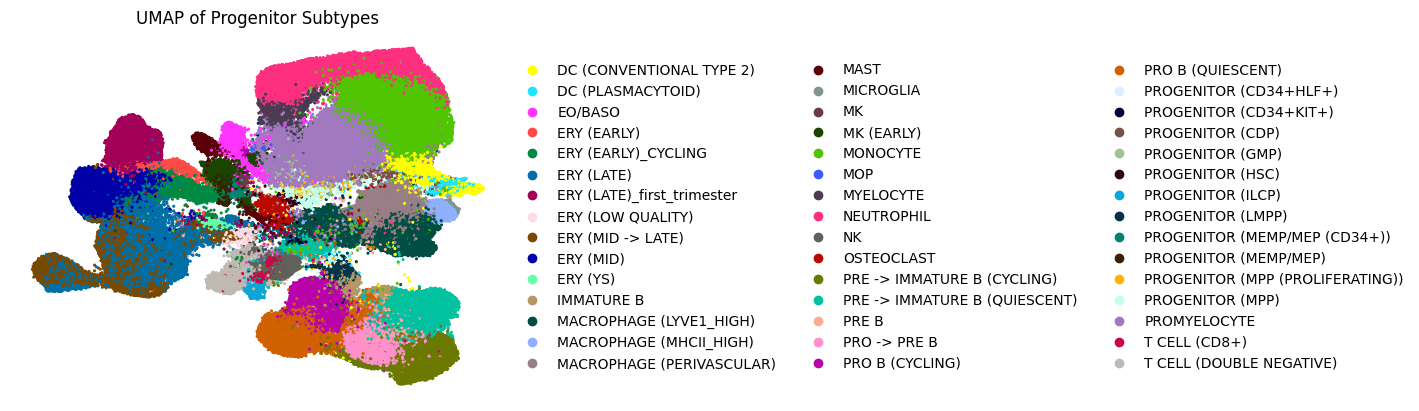

In [81]:
sc.pl.umap(
    adata,
    color="Haem_Manual_Annotation_Level1_V7_Non_Harmonised",
    size=20,
    frameon=False,
    groups=[],
    title="UMAP of Progenitor Subtypes"
)

In [74]:
len(mask==True)

202241

In [82]:
adata.obs['Haem_Manual_Annotation_Level1_V7']= adata.obs['Haem_Manual_Annotation_Level1_V7_Non_Harmonised'].copy()

In [87]:
adata.obs['Haem_Manual_Annotation_Level1_V7'] = adata.obs['Haem_Manual_Annotation_Level1_V7'].replace('MK (EARLY)', 'MK')


/software/isg/languages/Python/Python-3.11.10-jupyter/exec/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


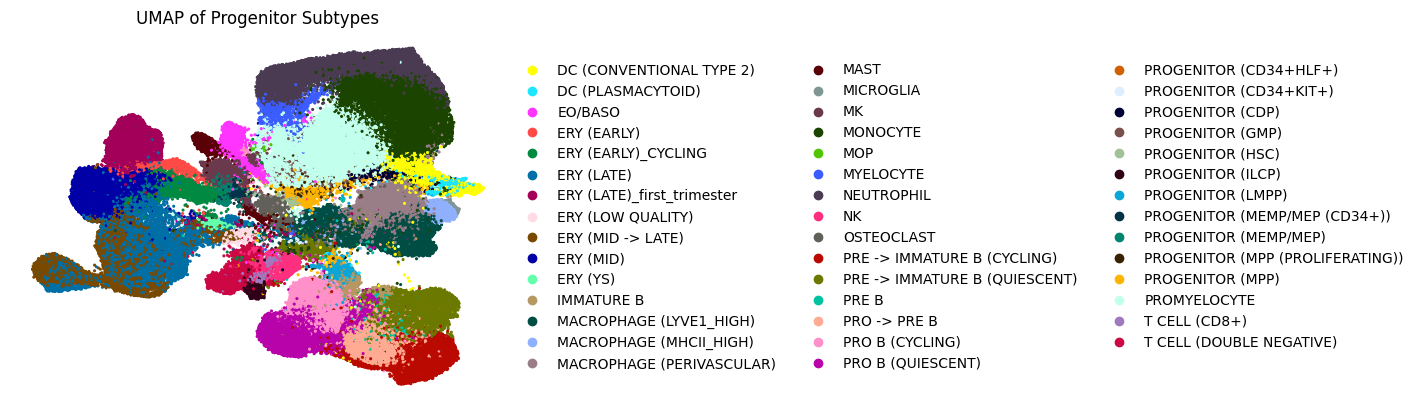

In [90]:
sc.pl.umap(
    adata,
    color="Haem_Manual_Annotation_Level1_V7",
    size=20,
    frameon=False,
    groups=[],
    title="UMAP of Progenitor Subtypes"
)

In [91]:
adata.write_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_haem_compartment/bone_haem_atlas_FINAL_OBJECT_V3_FULL_GENES_for_figs.h5ad')

In [92]:
adata.obs[['Haem_Manual_Annotation_Level1_V7']].to_csv('/nfs/team298/sm54/BoneAtlasProject/metadata/cell_metadata/Haem_Manual_Annotation_Level1_V7.csv', index=True)
adata.obs[['Haem_Manual_Annotation_Level1_V7_Non_Harmonised']].to_csv('/nfs/team298/sm54/BoneAtlasProject/metadata/cell_metadata/Haem_Manual_Annotation_Level1_V7_Non_Harmonised.csv', index=True)
